In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
import requests

In [5]:
#Baixar o dataset
url = 'https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv'
response = requests.get(url)

#salvando o arquivo localmente
with open('FuelConsumptionCo2.csv', 'wb') as file:
    file.write(response.content)

print("Download concluído!")


Download concluído!


In [6]:
dados = pd.read_csv("FuelConsumptionCo2.csv")

In [7]:
dados.head

<bound method NDFrame.head of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

In [8]:
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
#Para esse projeto, será selecionado as features do Motor e CO2

motores = dados[['ENGINESIZE']]
co2 = dados[['CO2EMISSIONS']]
motores.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [13]:
#Dividir o dataset em dados de treino e teste

motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores,co2,test_size=0.2,random_state=42)
type(motores_treino)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Emissão de CO2')

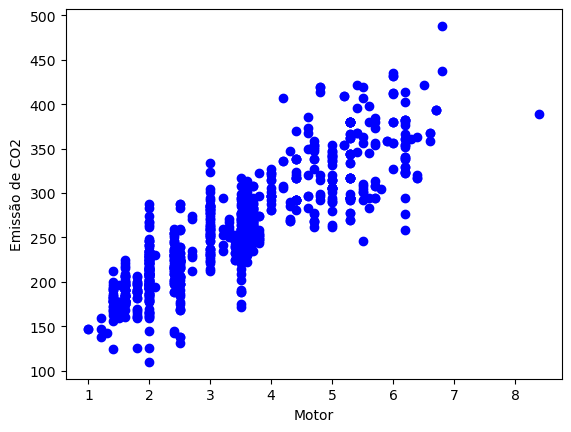

In [14]:
#Correlacoes dos dados de treinamento
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")

In [15]:
#Treinando o modelo de Regressao Linear
modelo = linear_model.LinearRegression()
modelo.fit(motores_treino, co2_treino)

LinearRegression()

In [16]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


Text(0, 0.5, 'Emissão de CO2')

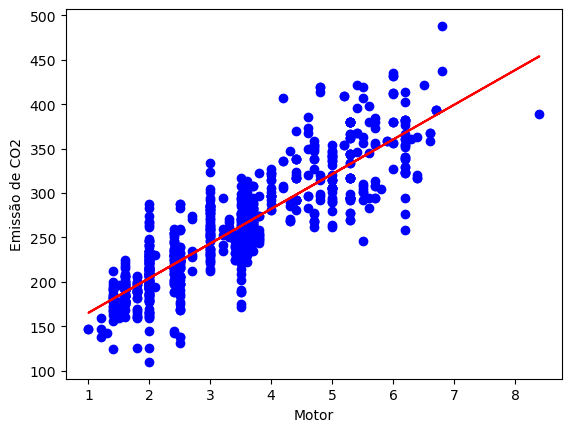

In [24]:
#Reta de regressao nos dados de treino


reta = modelo.coef_[0][0]*motores_treino + modelo.intercept_[0]
#modelo.coef_: retorna um array 2D (mesmo com uma variável), por isso o [0][0] é necessário para acessar o coeficiente real.
#modelo.intercept_: retorna um array 1D, então você usa [0] para acessar o valor do intercepto.

plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, reta, 'r')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")

In [31]:
#Testar isso nos de teste
predCo2 = modelo.predict(motores_teste)
#predCo2 contém as previsões do modelo. Pode-se usar essas previsões para:
#Comparar visualmente com os dados reais, calcular métricas de desempenho, analisar a qualidade do modelo e suas previsões.

Text(0.5, 0, 'Motores')

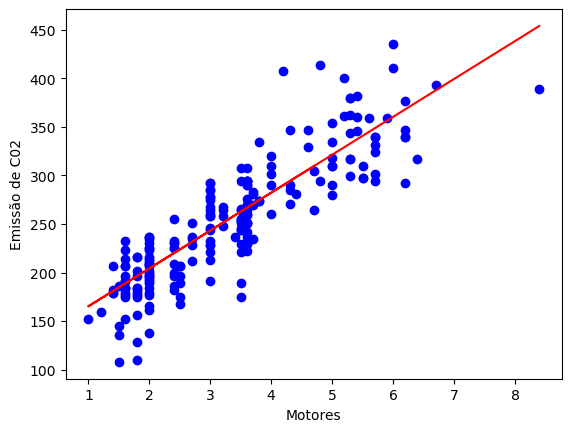

In [32]:
plt.scatter(motores_teste, co2_teste, color='blue')

reta = modelo.coef_[0][0]*motores_teste + modelo.intercept_[0]
plt.plot(motores_teste,reta, '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")

In [33]:
#Avaliar métricas do modelo

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predCo2)))
print("R2-score: %.2f" % r2_score(predCo2 , co2_teste) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Beatriz Almeida\AppData\Local\Temp\ipykernel_8464\563931471.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predCo2 - co2_teste)**2))


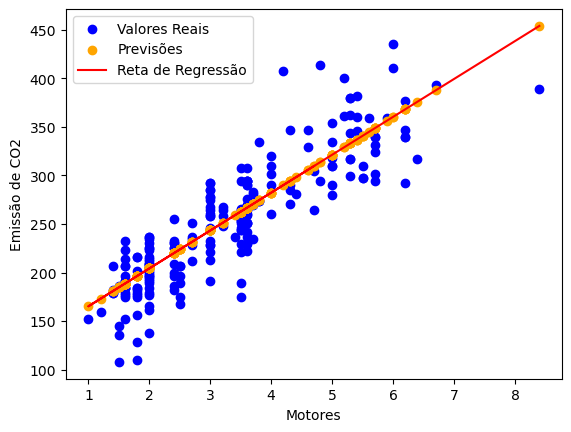

In [35]:
#Comparar com valores reais
plt.scatter(motores_teste, co2_teste, color='blue', label='Valores Reais')
plt.scatter(motores_teste, predCo2, color='orange', label='Previsões')
plt.plot(motores_teste, reta, '-r', label='Reta de Regressão')
plt.ylabel("Emissão de CO2")
plt.xlabel("Motores")
plt.legend()  

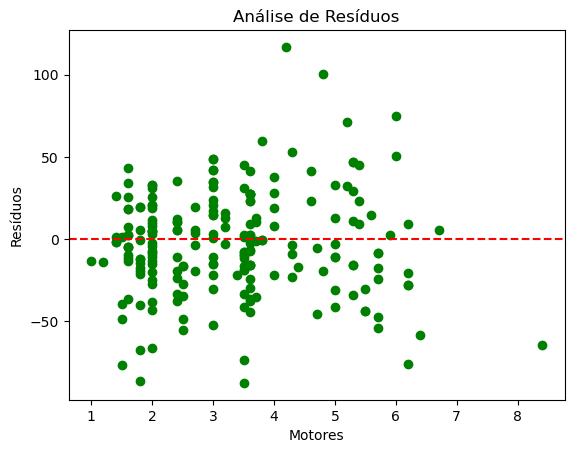

In [36]:
#Analisar residuos

residuos = co2_teste - predCo2
plt.scatter(motores_teste, residuos, color='green')
plt.axhline(0, color='red', linestyle='--') 
plt.ylabel("Resíduos")
plt.xlabel("Motores")
plt.title("Análise de Resíduos")
plt.show()
